**IMPORT LIBRARIES**



In [50]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [51]:
#Read File
df_Original = pd.read_csv(r"C:\Users\imman\OneDrive\Desktop\EV_data.csv")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = df_Original.copy()

In [52]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,34,Chennai,Consultant,Married,Post-Graduate,9,3197012.782,Yes,Sedan,Yes,TVS,<10 lakhs,2,No
1,47,Visakhapatnam,Artist,Married,High School,4,342386.822,Yes,SUV,No,Hero,<20 lakhs,2,No
2,56,Visakhapatnam,Business,Single,High School,2,4659748.826,Maybe,SUV,No,Toyota,<5 lakhs,4,"Yes, in <20 years"
3,53,Hyderabad,Accountant,Divorced,Undergraduate,8,4519731.205,Maybe,SUV,Yes,KIA,<15 lakhs,2,"Yes, in <20 years"
4,64,Kashipur,Lawyer,Divorced,High School,6,2507395.607,Maybe,Sedan,No,Mahindra,<20 lakhs,3,"Yes, in <10 years"


**DATA PREPROCESSING**

In [53]:
df.isnull().sum()

Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of EV would you prefer?                          0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV                                             0
Do you think Electronic vehicles will 

In [54]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [55]:
df.shape

(500, 14)

In [56]:
#Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Age                                                                   500 non-null    int64  
 1   City                                                                  500 non-null    object 
 2   Profession                                                            500 non-null    object 
 3   Marital Status                                                        500 non-null    object 
 4   Education                                                             500 non-null    object 
 5   No. of Family members                                                 500 non-null    int64  
 6   Annual Income                                                         500 non-null    float64
 7  

In [57]:
df['Age'].unique()

array([34, 47, 56, 53, 64, 38, 44, 20, 68, 75, 24, 52, 76, 46, 50, 37, 79,
       55, 26, 18, 51, 49, 65, 41, 66, 19, 60, 28, 25, 71, 22, 78, 43, 21,
       72, 36, 29, 33, 74, 62, 77, 42, 39, 30, 32, 54, 57, 40, 48, 73, 69,
       61, 59, 35, 23, 45, 58, 67, 31, 70, 27, 63], dtype=int64)

In [58]:
df['City'].unique()

array(['Chennai', 'Visakhapatnam', 'Hyderabad', 'Kashipur', 'Bhopal',
       'Satara', 'Jaipur', 'Coimbatore', 'Mumbai', 'Pune', 'Nabha',
       'Bangalore', 'Ahmedabad', 'Lucknow', 'Kolkata', 'Delhi', 'Patna',
       'Vadodara'], dtype=object)

In [59]:
df["City"] = df["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["City"] = df["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["City"] = df["City"].replace({"Banglore ":"Bengaluru"})
df["City"] = df["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["City"] = df["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["City"] = df["City"].replace({"nashik":"Nashik"})

In [60]:
df['No. of Family members'].unique()

array([9, 4, 2, 8, 6, 5, 3, 1, 7], dtype=int64)

In [61]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<10 lakhs', '<20 lakhs', '<5 lakhs', '<15 lakhs'], dtype=object)

In [62]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

**DATA VISUALIZATION**

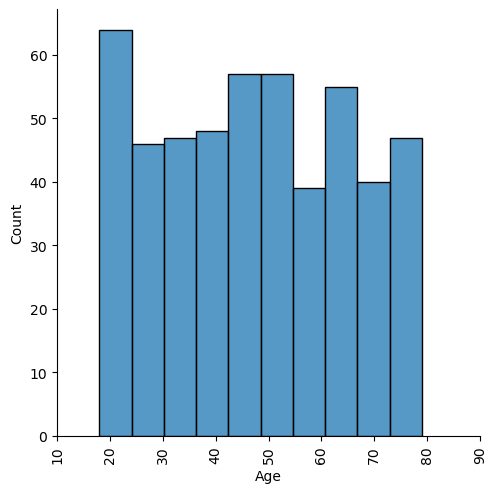

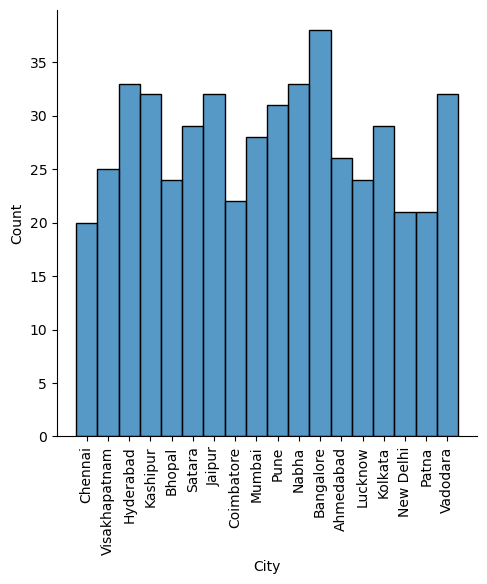

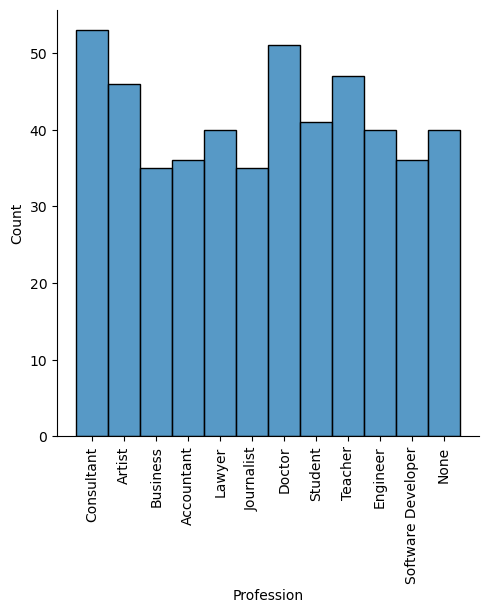

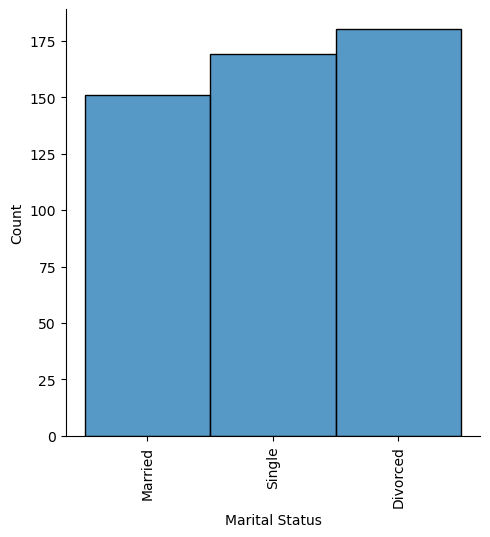

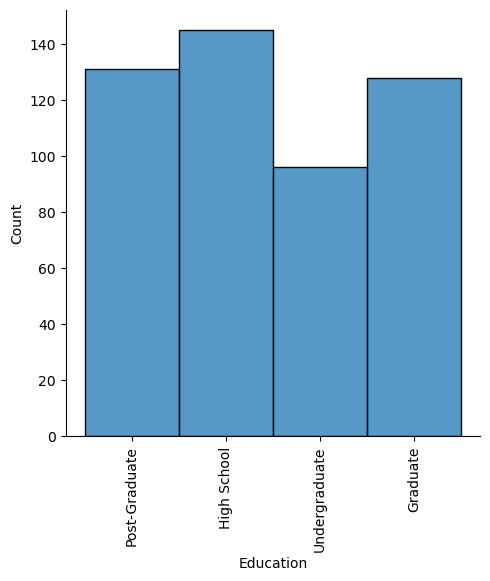

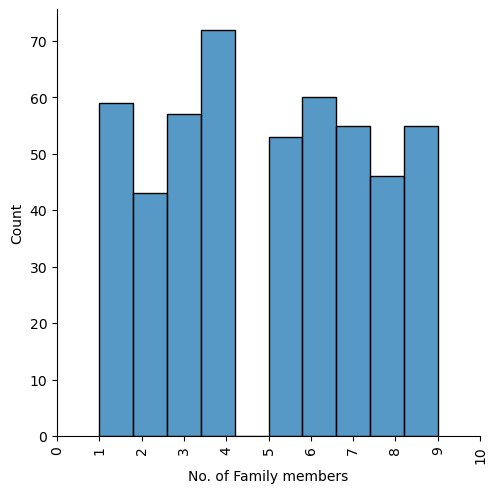

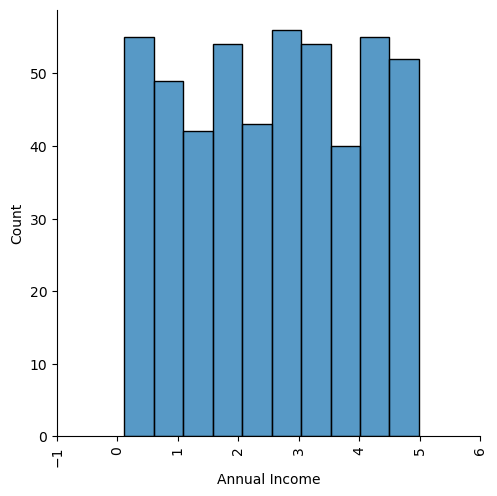

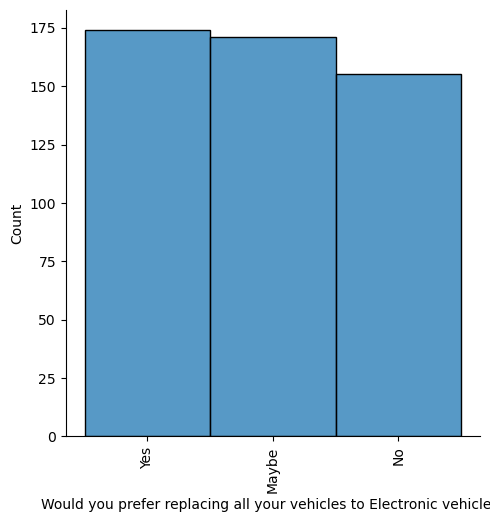

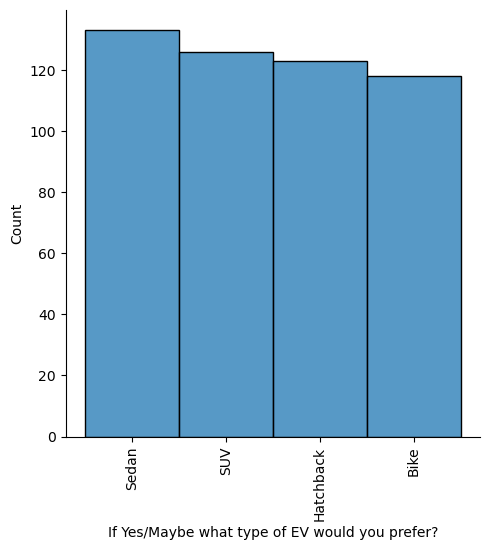

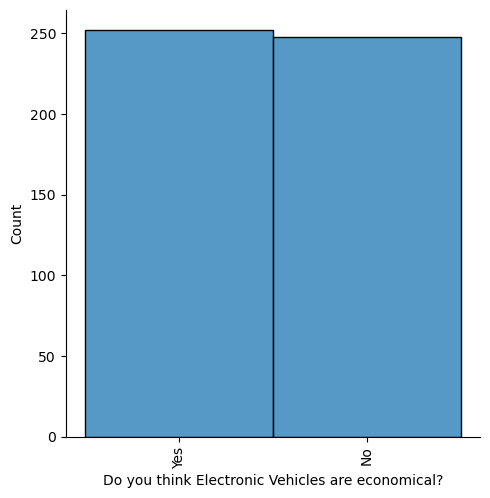

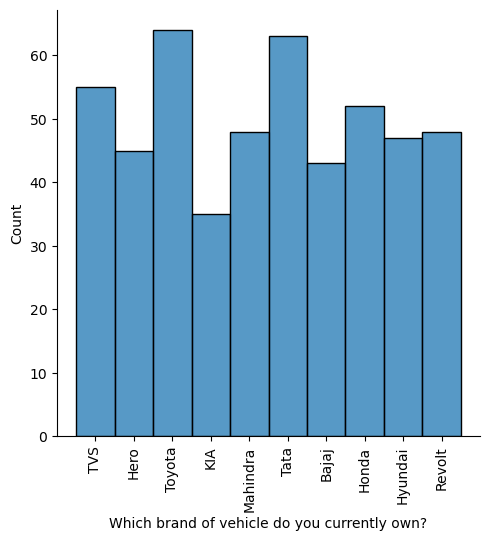

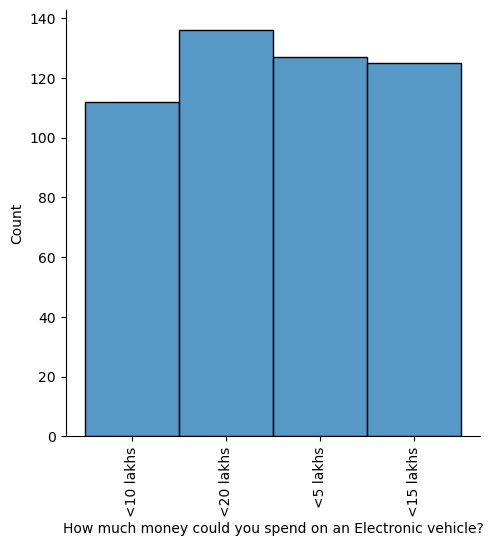

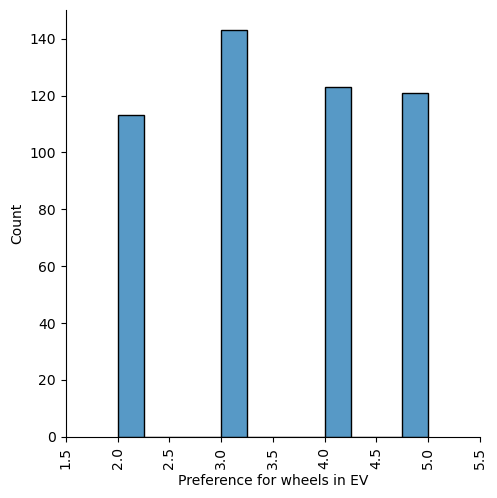

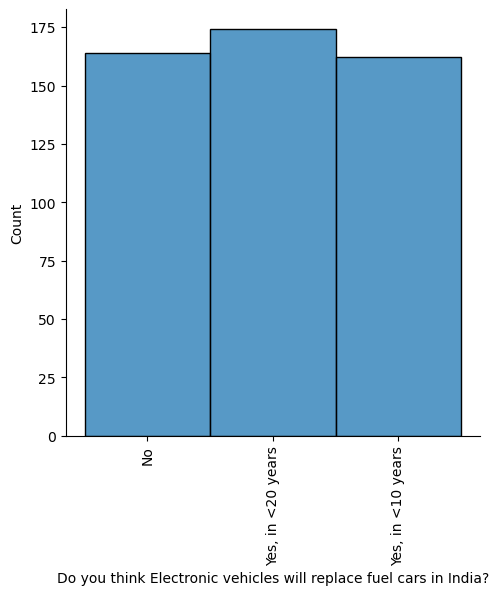

In [63]:
for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)
    

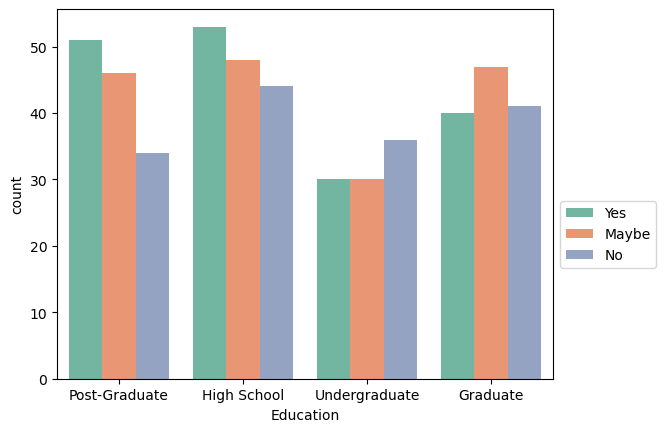

In [64]:
sns.countplot(x ='Education', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

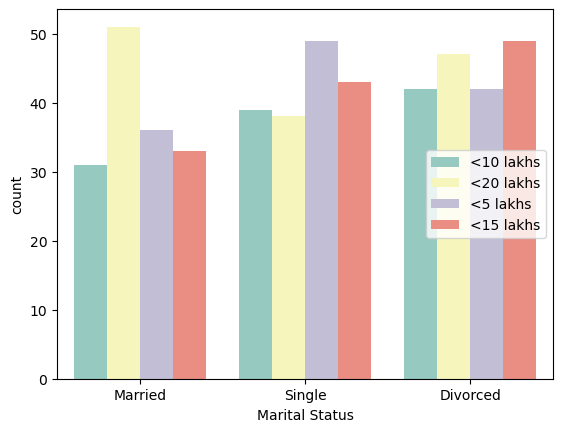

In [65]:
sns.countplot(x ='Marital Status', hue = 'How much money could you spend on an Electronic vehicle?',  data = df, palette = 'Set3')
plt.legend(loc='center right')
plt.show()

In [66]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,500.000,500.000,500.000,500.000
mean,47.388,4.954,2557212.602,3.504
std,17.626,2.534,1429488.569,1.090
min,18.000,1.000,110553.689,2.000
25%,32.000,3.000,1356396.220,3.000
50%,47.000,5.000,2618034.790,3.000
75%,62.250,7.000,3771031.522,4.000
max,79.000,9.000,4989858.139,5.000


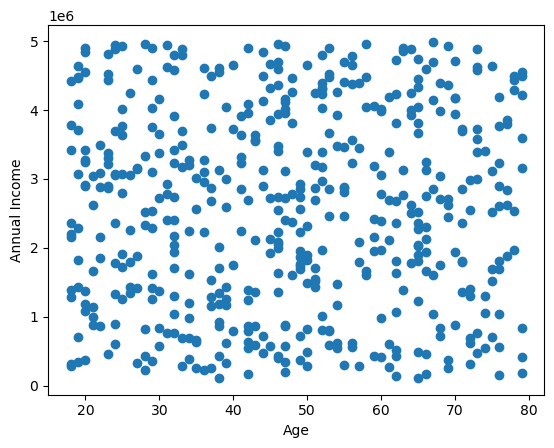

In [67]:
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])

<Axes: xlabel='Age', ylabel='count'>

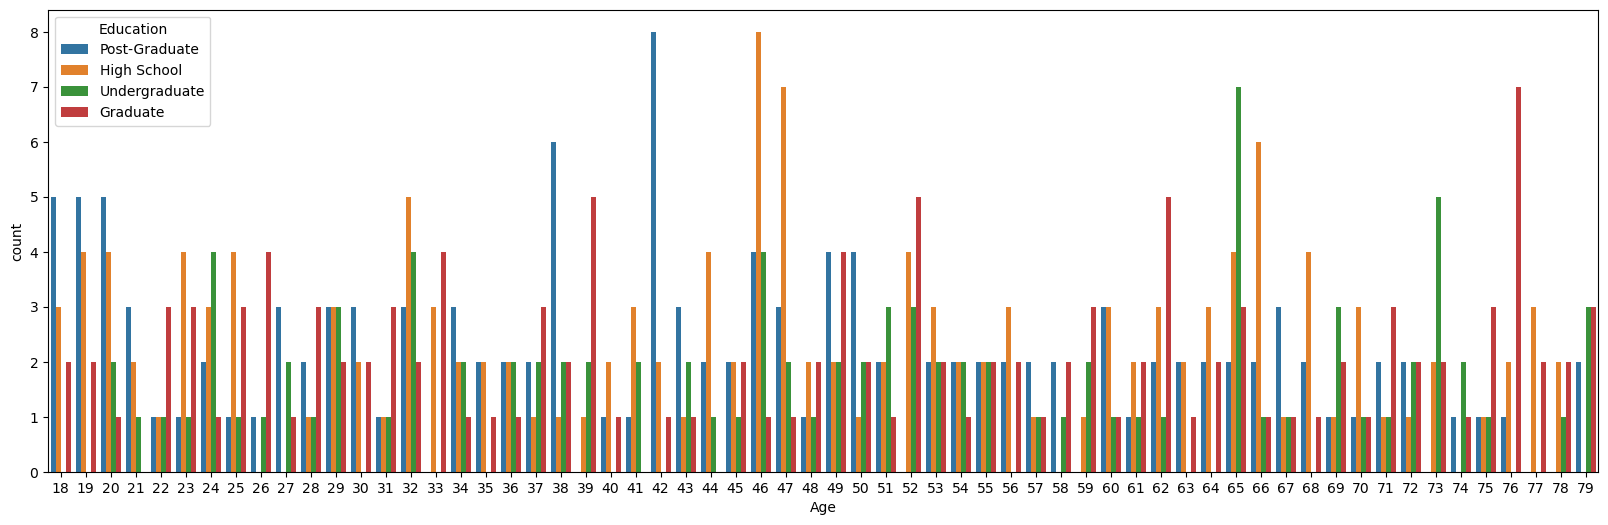

In [68]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

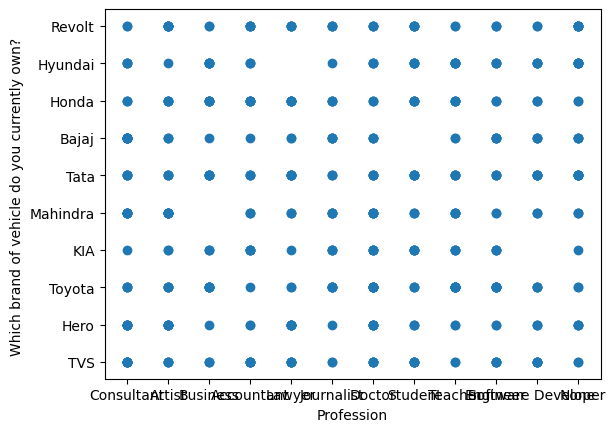

In [69]:
plt.xlabel('Profession')
plt.ylabel('Which brand of vehicle do you currently own? ')
plt.scatter(df['Profession'],df['Which brand of vehicle do you currently own?'])

<Axes: xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

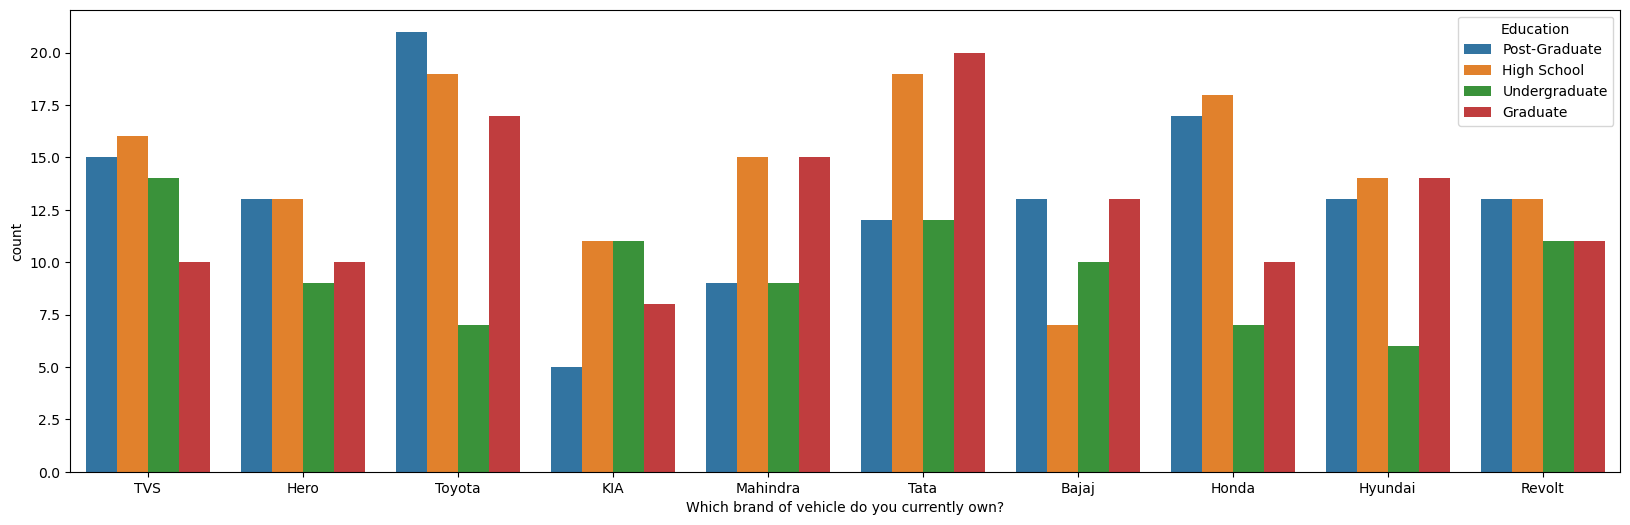

In [70]:
plt.figure(figsize=(20,6))
sns.countplot(x="Which brand of vehicle do you currently own?", data=df, hue="Education")

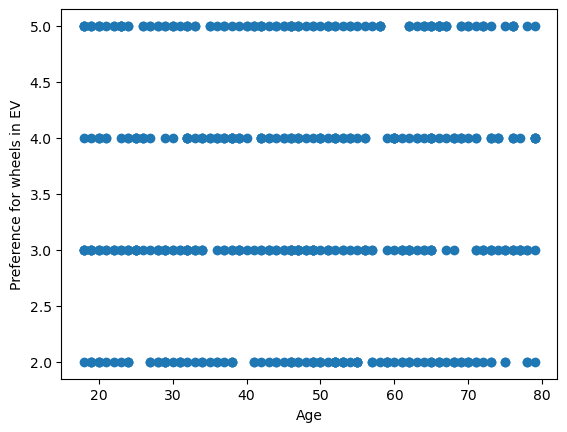

In [71]:
plt.xlabel('Age')
plt.ylabel('Preference for wheels in EV')
plt.scatter(df['Age'],df['Preference for wheels in EV'])

<Axes: >

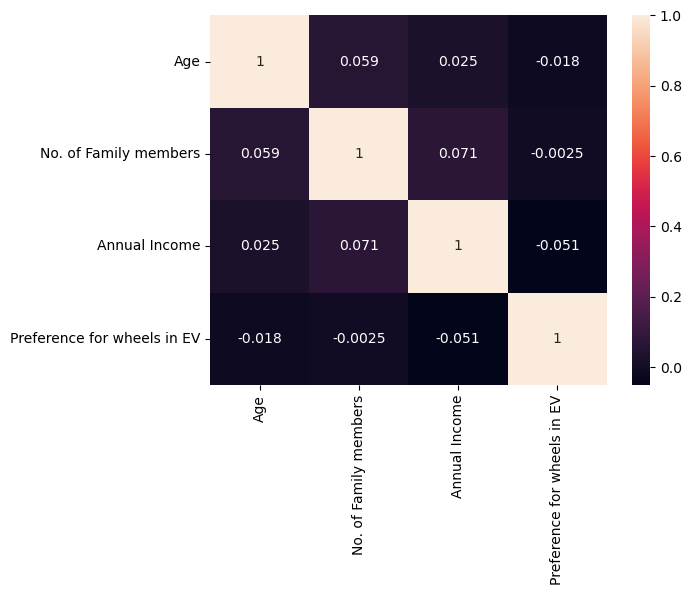

In [72]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True)

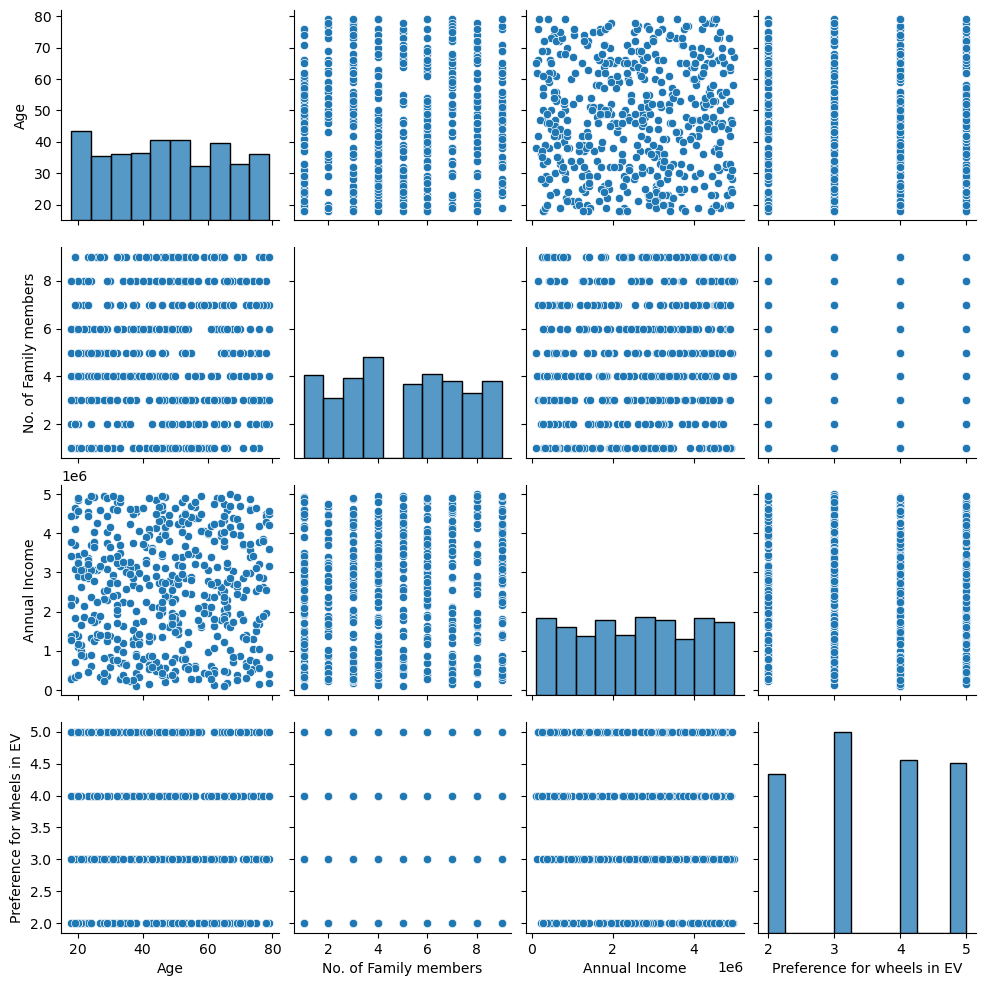

In [73]:
sns.pairplot(df)

In [74]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [75]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [76]:
df['Profession']= label_encode(df,'Profession')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
#df['If Yes/Maybe what type of  EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [77]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the column 'If Yes/Maybe what type of EV would you prefer?'
df['If Yes/Maybe what type of EV would you prefer?'] = label_encoder.fit_transform(df['If Yes/Maybe what type of EV would you prefer?'].astype(str))


In [78]:
df.head()
df.tail()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
495,74,Ahmedabad,8,0,3,3,3411643.571,0,2,0,2,1,4,0
496,20,Bangalore,1,1,2,5,4905509.236,0,1,1,7,2,4,1
497,50,Jaipur,11,0,2,4,3396020.887,0,2,1,3,3,4,2
498,49,Kashipur,6,1,3,2,1686098.170,2,0,1,4,3,3,0
499,65,Kolkata,6,1,0,2,2364393.630,1,1,0,0,3,2,2


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,34,Chennai,3,1,2,9,3197012.782,2,3,1,7,0,2,0
1,47,Visakhapatnam,1,1,1,4,342386.822,2,2,0,1,2,2,0
2,56,Visakhapatnam,2,2,1,2,4659748.826,0,2,0,9,3,4,2
3,53,Hyderabad,0,0,3,8,4519731.205,0,2,1,4,1,2,2
4,64,Kashipur,7,0,1,6,2507395.607,0,3,0,5,2,3,1


In [81]:
y = df['City']
X = df.drop(['City'],axis=1,inplace = True)

In [82]:
df.head()

,Age,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,34,3,1,2,9,3197012.782,2,3,1,7,0,2,0
1,47,1,1,1,4,342386.822,2,2,0,1,2,2,0
2,56,2,2,1,2,4659748.826,0,2,0,9,3,4,2
3,53,0,0,3,8,4519731.205,0,2,1,4,1,2,2
4,64,7,0,1,6,2507395.607,0,3,0,5,2,3,1


In [83]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [84]:
X = df.iloc[:,:-1]


In [85]:
calc_vif(X)

,variables,VIF
0,Age,7.180
1,Profession,3.395
2,Marital Status,2.323
3,Education,2.655
4,No. of Family members,4.591
5,Annual Income,3.931
6,Would you prefer replacing all your vehicles t...,2.371
7,If Yes/Maybe what type of EV would you prefer?,2.862
8,Do you think Electronic Vehicles are economical?,1.985
9,Which brand of vehicle do you currently own?,3.442


**VIF equal to 1 = variables are not correlated,
VIF between 1 and 5 = variables are moderately correlated,
VIF greater than 5 = variables are highly correlated**

**K MEANS MODEL**

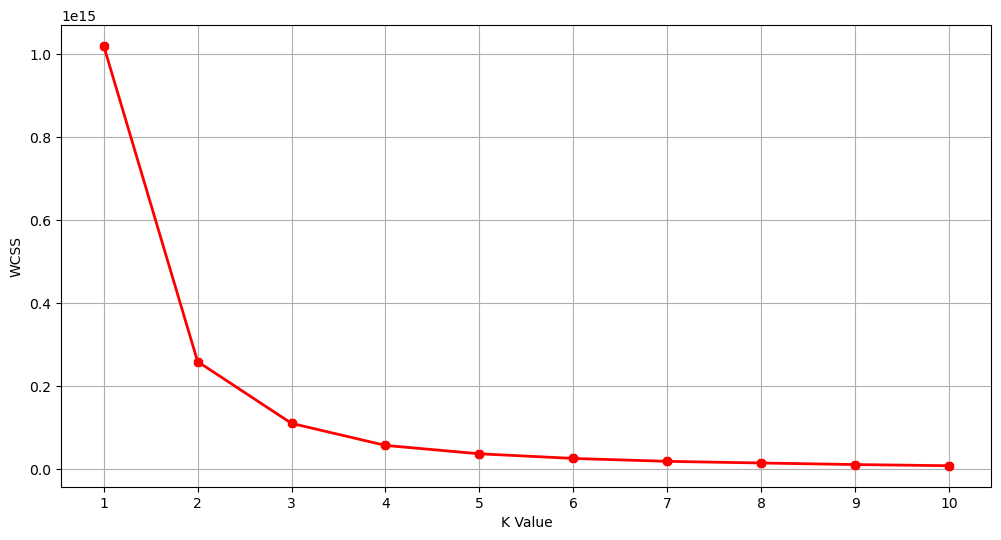

In [86]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

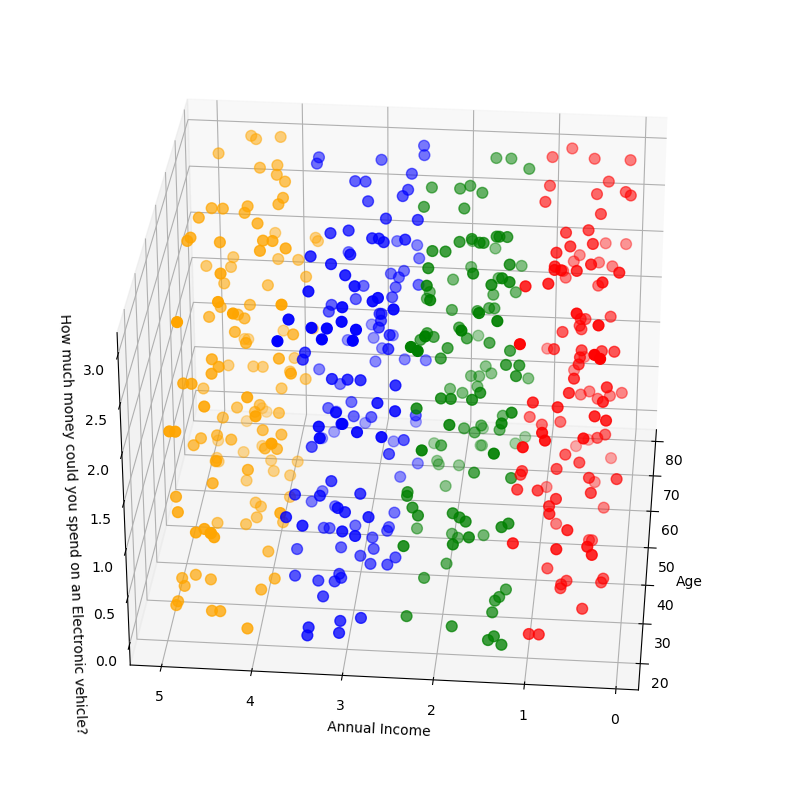

In [87]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

df_Original["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income"][df.Cluster == 0], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income"][df.Cluster == 1], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income"][df.Cluster == 2], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income"][df.Cluster == 3], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

In [88]:
df.head()

,Age,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,34,3,1,2,9,3197012.782,2,3,1,7,0,2,0,0
1,47,1,1,1,4,342386.822,2,2,0,1,2,2,0,1
2,56,2,2,1,2,4659748.826,0,2,0,9,3,4,2,3
3,53,0,0,3,8,4519731.205,0,2,1,4,1,2,2,3
4,64,7,0,1,6,2507395.607,0,3,0,5,2,3,1,0


In [89]:
df1=df_Original.copy()
df1

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,34,Chennai,Consultant,Married,Post-Graduate,9,3197012.782,Yes,Sedan,Yes,TVS,<10 lakhs,2,No,0
1,47,Visakhapatnam,Artist,Married,High School,4,342386.822,Yes,SUV,No,Hero,<20 lakhs,2,No,1
2,56,Visakhapatnam,Business,Single,High School,2,4659748.826,Maybe,SUV,No,Toyota,<5 lakhs,4,"Yes, in <20 years",3
3,53,Hyderabad,Accountant,Divorced,Undergraduate,8,4519731.205,Maybe,SUV,Yes,KIA,<15 lakhs,2,"Yes, in <20 years",3
4,64,Kashipur,Lawyer,Divorced,High School,6,2507395.607,Maybe,Sedan,No,Mahindra,<20 lakhs,3,"Yes, in <10 years",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,74,Ahmedabad,None,Divorced,Undergraduate,3,3411643.571,Maybe,SUV,No,Honda,<15 lakhs,4,No,0
496,20,Bangalore,Artist,Married,Post-Graduate,5,4905509.236,Maybe,Hatchback,Yes,TVS,<20 lakhs,4,"Yes, in <10 years",3
497,50,Jaipur,Teacher,Divorced,Post-Graduate,4,3396020.887,Maybe,SUV,Yes,Hyundai,<5 lakhs,4,"Yes, in <20 years",0
498,49,Kashipur,Journalist,Married,Undergraduate,2,1686098.170,Yes,Bike,Yes,KIA,<5 lakhs,3,No,2


In [90]:
df1["City"] = df1["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["City"] = df1["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["City"] = df1["City"].replace({"Banglore ":"Bengaluru"})
df1["City"] = df1["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["City"] = df1["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["City"] = df1["City"].replace({"nashik":"Nashik"})

In [91]:
df1['Cluster'].value_counts() 

0    137
3    129
2    122
1    112
Name: Cluster, dtype: int64

In [92]:
# Segregrating each cluster

Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]
Cluster_2.shape

(122, 15)

In [93]:
[Cluster_0['Age'].value_counts().head(3), 
 Cluster_1['Age'].value_counts().head(3), 
 Cluster_2['Age'].value_counts().head(3), 
 Cluster_3['Age'].value_counts().head(3)]

[23    5
 20    5
 55    5
 Name: Age, dtype: int64,
 47    5
 42    5
 38    5
 Name: Age, dtype: int64,
 65    7
 32    6
 49    6
 Name: Age, dtype: int64,
 52    6
 65    5
 46    5
 Name: Age, dtype: int64]

## Based on the clusters, it is optimal to target age groups of 23-38

### Cluster 0: The top cities in this cluster are Satara, Jaipur, Kashipur, Chennai, and Nabha. These cities have relatively higher representation in Cluster 0 compared to other cities.

### Cluster 1: The top cities in this cluster are Hyderabad, Kolkata, Visakhapatnam, Satara, and Kashipur. These cities are more prevalent in Cluster 1 compared to others.

### Cluster 2: The top cities in this cluster are Bangalore, Vadodara, Nabha, Hyderabad, and Kolkata. These cities are more prominent within Cluster 2.

### Cluster 3: The top cities in this cluster are Vadodara, Mumbai, Bangalore, Jaipur, and Nabha. These cities have higher representation within Cluster 3.

In [94]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(), 
 Cluster_2['City'].value_counts().head(), 
 Cluster_3['City'].value_counts().head()]

[Satara      12
 Jaipur      11
 Kashipur    11
 Chennai      9
 Nabha        9
 Name: City, dtype: int64,
 Hyderabad        11
 Kolkata           9
 Visakhapatnam     8
 Satara            8
 Kashipur          8
 Name: City, dtype: int64,
 Bangalore    12
 Vadodara     10
 Nabha         9
 Hyderabad     8
 Kolkata       8
 Name: City, dtype: int64,
 Vadodara     11
 Mumbai       10
 Bangalore    10
 Jaipur        9
 Nabha         9
 Name: City, dtype: int64]

## Based on the clustering, the optimal locations to start EV business are Bangalore, jaipur, hyderabad, Nabha

## Cluster 0:
#### Top professions: Consultant, None, Teacher, Doctor, Lawyer

## Cluster 1:
#### Top professions: Doctor, Student, Artist, Business, Teacher

## Cluster 2:
#### Top professions: Software Developer, Accountant, Doctor, Student, Consultant

## Cluster 3:
### Top professions: Engineer, Teacher, Artist, Consultant, Lawyer

In [96]:
[Cluster_0['Profession'].value_counts().head(), 
 Cluster_1['Profession'].value_counts().head(), 
 Cluster_2['Profession'].value_counts().head(), 
 Cluster_3['Profession'].value_counts().head()]

[Consultant    19
 None          17
 Teacher       14
 Doctor        14
 Lawyer        12
 Name: Profession, dtype: int64,
 Doctor      18
 Student     15
 Artist      13
 Business     9
 Teacher      9
 Name: Profession, dtype: int64,
 Software Developer    15
 Accountant            13
 Doctor                13
 Student               12
 Consultant            11
 Name: Profession, dtype: int64,
 Engineer      19
 Teacher       15
 Artist        14
 Consultant    14
 Lawyer        13
 Name: Profession, dtype: int64]

## Business owners have the least interest in electric vehicles, Population in the working population category have higher interest in EVs

In [177]:
[Cluster_0['Annual Income'].mean(), 
 Cluster_1['Annual Income'].mean(), 
 Cluster_2['Annual Income'].mean(), 
 Cluster_3['Annual Income'].mean()]

[3066131.7445786027, 618346.1376373533, 1816667.7427961754, 4400449.766132985]

### Cluster 3 has higher average income


### Cluster 0: In this cluster, there are 49 individuals who are single, 44 individuals who are married, and 44 individuals who are divorced.

### Cluster 1: In this cluster, there are 40 individuals who are single, 38 individuals who are divorced, and 34 individuals who are married.

### Cluster 2: In this cluster, there are 47 individuals who are divorced, 38 individuals who are married, and 37 individuals who are single.

### Cluster 3: In this cluster, there are 51 individuals who are divorced, 43 individuals who are single, and 35 individuals who are married.



In [178]:
[Cluster_0['Marital Status'].value_counts().head(), 
 Cluster_1['Marital Status'].value_counts().head(), 
 Cluster_2['Marital Status'].value_counts().head(), 
 Cluster_3['Marital Status'].value_counts().head()]

[Single      49
 Married     44
 Divorced    44
 Name: Marital Status, dtype: int64,
 Single      40
 Divorced    38
 Married     34
 Name: Marital Status, dtype: int64,
 Divorced    47
 Married     38
 Single      37
 Name: Marital Status, dtype: int64,
 Divorced    51
 Single      43
 Married     35
 Name: Marital Status, dtype: int64]

## Single Marital status people are more interested in EVs

In [179]:
m=Cluster_3[Cluster_3['Marital Status']=='Single']
m['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Maybe    16
Yes      14
No       13
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

### Cluster 0: In this cluster, the most common number of family members is 4, followed by 6, 9, 8, and 3.

### Cluster 1: In this cluster, the most common number of family members is 7, followed by 4, 1, 3, and 5.

### Cluster 2: In this cluster, the most common number of family members is 4, followed by 1, 6, 3, and 2.

### Cluster 3: In this cluster, the most common number of family members is 5, followed by 7, 9, 1, and 3.

In [180]:
[Cluster_0['No. of Family members'].value_counts().head(), 
 Cluster_1['No. of Family members'].value_counts().head(), 
 Cluster_2['No. of Family members'].value_counts().head(), 
 Cluster_3['No. of Family members'].value_counts().head()]

[4    25
 6    21
 9    18
 8    15
 3    13
 Name: No. of Family members, dtype: int64,
 7    18
 4    16
 1    15
 3    14
 5    13
 Name: No. of Family members, dtype: int64,
 4    18
 1    17
 6    17
 3    16
 2    13
 Name: No. of Family members, dtype: int64,
 5    20
 7    18
 9    15
 1    14
 3    14
 Name: No. of Family members, dtype: int64]

### Family with 3-5 members are more interested in EV.

### Cluster 0: In this cluster, the most common vehicle brand owned by individuals is Tata, followed by Hyundai, Hero, Bajaj, and Toyota.

### Cluster 1: In this cluster, the most common vehicle brand owned by individuals is Tata, followed by Toyota, Revolt, TVS, and Hero.

### Cluster 2: In this cluster, the most common vehicle brand owned by individuals is Toyota, followed by Revolt, TVS, Honda, and Hyundai.

### Cluster 3: In this cluster, the most common vehicle brand owned by individuals is Honda, followed by TVS, Mahindra, Toyota, and Tata.

In [181]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

[Tata       20
 Hyundai    18
 Hero       15
 Bajaj      14
 Toyota     14
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata      18
 Toyota    16
 Revolt    14
 TVS       13
 Hero      10
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Toyota     19
 Revolt     15
 TVS        12
 Honda      12
 Hyundai    12
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Honda       22
 TVS         17
 Mahindra    17
 Toyota      15
 Tata        13
 Name: Which brand of vehicle do you currently own?, dtype: int64]

### Tata, Hyundai, Honda and toyota are the most owned brands by customers

### Cluster 0: In this cluster, the most common education level is High School, followed by Graduate, Post-Graduate, and Undergraduate.

### Cluster 1: In this cluster, the most common education level is Post-Graduate, followed by Graduate, High School, and Undergraduate.

### Cluster 2: In this cluster, the most common education levels are Post-Graduate and Graduate, followed by Undergraduate and High School.

### Cluster 3: In this cluster, the most common education level is High School, followed by Graduate, Post-Graduate, and Undergraduate.

In [182]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(), 
 Cluster_2['Education'].value_counts().head(), 
 Cluster_3['Education'].value_counts().head()]

[High School      43
 Graduate         41
 Post-Graduate    31
 Undergraduate    22
 Name: Education, dtype: int64,
 Post-Graduate    42
 Graduate         26
 High School      25
 Undergraduate    19
 Name: Education, dtype: int64,
 Post-Graduate    32
 Graduate         32
 Undergraduate    31
 High School      27
 Name: Education, dtype: int64,
 High School      50
 Graduate         29
 Post-Graduate    26
 Undergraduate    24
 Name: Education, dtype: int64]

In [183]:
e=Cluster_3[Cluster_3['Education']=='Graduate']
e['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Maybe    11
Yes      10
No        8
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

In [184]:
y= df_Original['Would you prefer replacing all your vehicles to Electronic vehicles?']
z=df_Original['Cluster']
x = list(zip(y, z))

i = pd.DataFrame(x,columns=['Would you prefer replacing all your vehicles to Electronic vehicles?', 'Cluster'])
(i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Yes').sum() + (i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Maybe').sum()

345

## 345 out of 500 customers would switch to electric vehicles. out of that Majority are post grad students and high school students

### Cluster 0: In this cluster, the most preferred type of EV is Sedan, followed by Hatchback and SUV.

### Cluster 1: In this cluster, the most preferred type of EV is SUV, followed by Bike and Hatchback.

### Cluster 2: In this cluster, the most preferred type of EV is Sedan, followed by Bike and Hatchback.

### Cluster 3: In this cluster, the most preferred types of EVs are Sedan and SUV, with Hatchback being the least preferred.

In [185]:
print(Cluster_0['If Yes/Maybe what type of EV would you prefer?'].value_counts().head(3))
print(Cluster_1['If Yes/Maybe what type of EV would you prefer?'].value_counts().head(3))
print(Cluster_2['If Yes/Maybe what type of EV would you prefer?'].value_counts().head(3))
print(Cluster_3['If Yes/Maybe what type of EV would you prefer?'].value_counts().head(3))

Sedan        45
Hatchback    39
SUV          30
Name: If Yes/Maybe what type of EV would you prefer?, dtype: int64
SUV          36
Bike         34
Hatchback    28
Name: If Yes/Maybe what type of EV would you prefer?, dtype: int64
Sedan        36
Bike         33
Hatchback    28
Name: If Yes/Maybe what type of EV would you prefer?, dtype: int64
Sedan        38
SUV          35
Hatchback    28
Name: If Yes/Maybe what type of EV would you prefer?, dtype: int64


### Based on the clusters Sedan is the most preferred type of EV followed by bikes and hatchbacks

### Cluster 0: In this cluster, the most common budget preference is "<5 lakhs", followed by "<10 lakhs", "<20 lakhs", and "<15 lakhs".

### Cluster 1: In this cluster, the most common budget preference is "<20 lakhs", followed by "<15 lakhs", "<5 lakhs", and "<10 lakhs".

### Cluster 2: In this cluster, the most common budget preference is "<20 lakhs", followed by "<5 lakhs", "<15 lakhs", and "<10 lakhs".

### Cluster 3: In this cluster, the most common budget preference is "<15 lakhs", followed by "<10 lakhs", "<20 lakhs", and "<5 lakhs".

In [95]:
print(Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_3['How much money could you spend on an Electronic vehicle?'].value_counts().head())

<5 lakhs     37
<10 lakhs    36
<20 lakhs    35
<15 lakhs    29
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<20 lakhs    33
<15 lakhs    31
<5 lakhs     30
<10 lakhs    18
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<20 lakhs    36
<5 lakhs     32
<15 lakhs    29
<10 lakhs    25
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    36
<10 lakhs    33
<20 lakhs    32
<5 lakhs     28
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
